<a href="https://colab.research.google.com/github/Fyannn79/UTS_PCD/blob/main/UTS_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload gambar grayscale (.jpg / .png)


Saving city-3479697_960_720.jpg to city-3479697_960_720.jpg


/tmp/ipython-input-3279892833.py:29: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-3279892833.py:29: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + np.max(img))
/tmp/ipython-input-3279892833.py:30: RuntimeWarning: divide by zero encountered in log
  result = c * np.log(1 + img)
/tmp/ipython-input-3279892833.py:30: RuntimeWarning: invalid value encountered in multiply
  result = c * np.log(1 + img)
/tmp/ipython-input-3279892833.py:31: RuntimeWarning: invalid value encountered in cast
  return np.array(result, dtype=np.uint8)


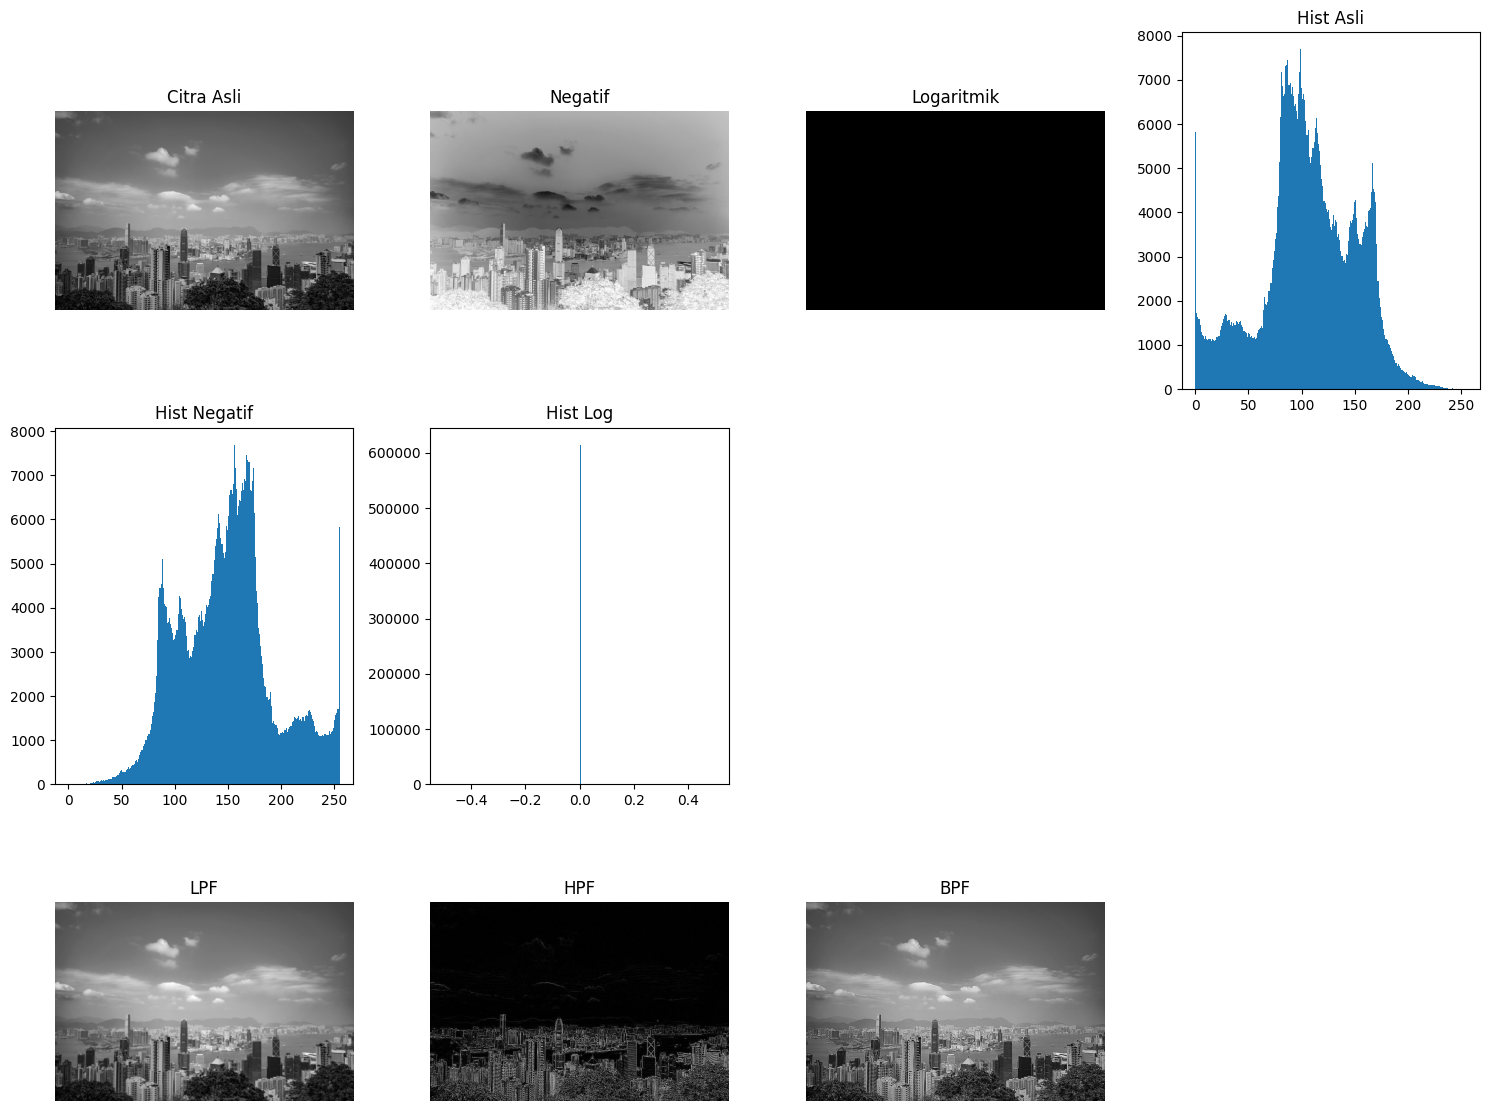

=== Nilai Rata-rata (Soal 2) ===
LPF: 106.09229329427083
HPF: 20.199588216145834
BPF: 109.28000813802083


In [1]:
# ================================================================
#                 UTS PENGOLAHAN CITRA DIGITAL
# ---------------------------------------------------------------
# Nama   : Muhammad Shofyan Assauri
# NIM    : 23423047
# Kelas  : IF23B
# ---------------------------------------------------------------
# Soal 1 : Transformasi Negatif, Log, dan Histogram
# Soal 2 : LPF, HPF, BPF (Konvolusi)
# ================================================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Upload gambar grayscale (.jpg / .png)")
uploaded = files.upload()
gambar_name = list(uploaded.keys())[0]

img = cv2.imread(gambar_name, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Gagal membaca gambar!")

def transform_negative(img):
    return 255 - img

def transform_log(img):
    c = 255 / np.log(1 + np.max(img))
    result = c * np.log(1 + img)
    return np.array(result, dtype=np.uint8)

def apply_filter(img, kernel):
    return cv2.filter2D(img, -1, kernel)

# Soal 1
negatif_img = transform_negative(img)
log_img = transform_log(img)

# Soal 2
LPF = (1/9) * np.ones((3,3))
HPF = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
BPF = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

lpf_img = apply_filter(img, LPF)
hpf_img = apply_filter(img, HPF)
bpf_img = apply_filter(img, BPF)

# Display
plt.figure(figsize=(15,12))

plt.subplot(3,4,1); plt.imshow(img, cmap='gray'); plt.title("Citra Asli"); plt.axis('off')
plt.subplot(3,4,2); plt.imshow(negatif_img, cmap='gray'); plt.title("Negatif"); plt.axis('off')
plt.subplot(3,4,3); plt.imshow(log_img, cmap='gray'); plt.title("Logaritmik"); plt.axis('off')
plt.subplot(3,4,4); plt.hist(img.ravel(),256); plt.title("Hist Asli")

plt.subplot(3,4,5); plt.hist(negatif_img.ravel(),256); plt.title("Hist Negatif")
plt.subplot(3,4,6); plt.hist(log_img.ravel(),256); plt.title("Hist Log")
plt.subplot(3,4,9); plt.imshow(lpf_img, cmap='gray'); plt.title("LPF"); plt.axis('off')
plt.subplot(3,4,10); plt.imshow(hpf_img, cmap='gray'); plt.title("HPF"); plt.axis('off')
plt.subplot(3,4,11); plt.imshow(bpf_img, cmap='gray'); plt.title("BPF"); plt.axis('off')

plt.tight_layout()
plt.show()

print("=== Nilai Rata-rata (Soal 2) ===")
print("LPF:", np.mean(lpf_img))
print("HPF:", np.mean(hpf_img))
print("BPF:", np.mean(bpf_img))
